# Statistics and Probability

In [2]:
%matplotlib inline

import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [4]:
data = pd.read_csv('datasets/Chapter 1/trip.csv')
data.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [7]:
print(len(data))

236065


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236065 entries, 0 to 236064
Data columns (total 12 columns):
trip_id              236065 non-null int64
starttime            236065 non-null object
stoptime             236065 non-null object
bikeid               236065 non-null object
tripduration         236065 non-null float64
from_station_name    236065 non-null object
to_station_name      236065 non-null object
from_station_id      236065 non-null object
to_station_id        236065 non-null object
usertype             236065 non-null object
gender               146171 non-null object
birthyear            146167 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 21.6+ MB


In [23]:
# determine the time range of the data
import warnings
warnings.filterwarnings('ignore')

data = data.sort_values(by='starttime')
data.reset_index()
print('Data range for dataset: %s - %s' %(data.ix[1,'starttime'], data.ix[len(data)-1, 'stoptime']))

Data range for dataset: 10/13/2014 10:32 - 9/1/2016 0:20


In [24]:
groupby_user = data.groupby('usertype').size()
groupby_user

usertype
Member                    146171
Short-Term Pass Holder     89894
dtype: int64

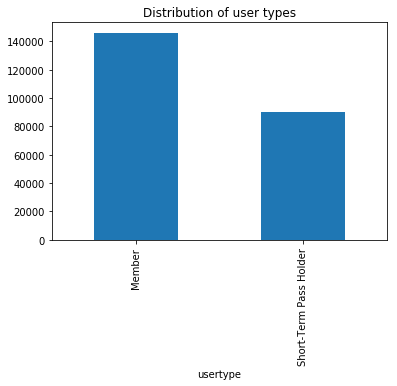

In [25]:
groupby_user.plot.bar(title='Distribution of user types')

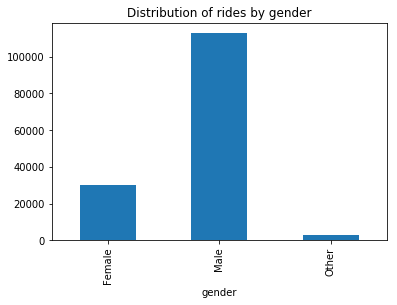

In [26]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Distribution of rides by gender')

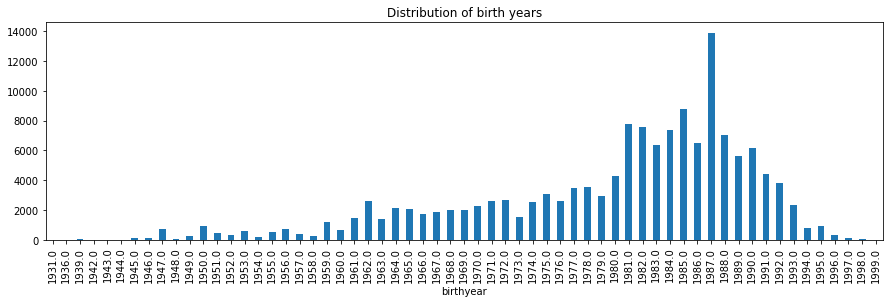

In [28]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of birth years', figsize=(15,4))

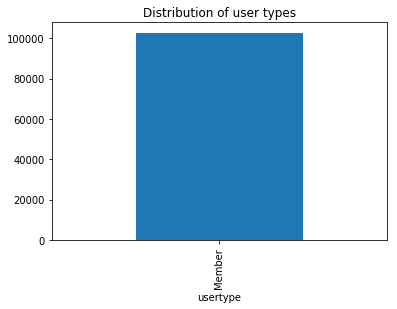

In [29]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear'] <=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution of user types')

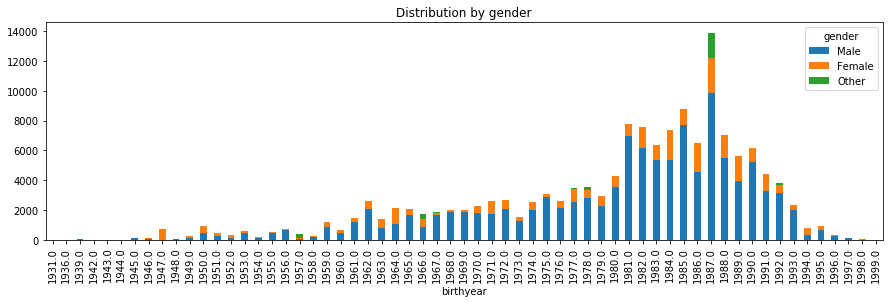

In [41]:
# multivariant EDA
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender
groupby_birthyear_gender[['Male', 'Female', 'Other']].plot.bar(title="Distribution by gender", stacked=True, figsize=(15,4))

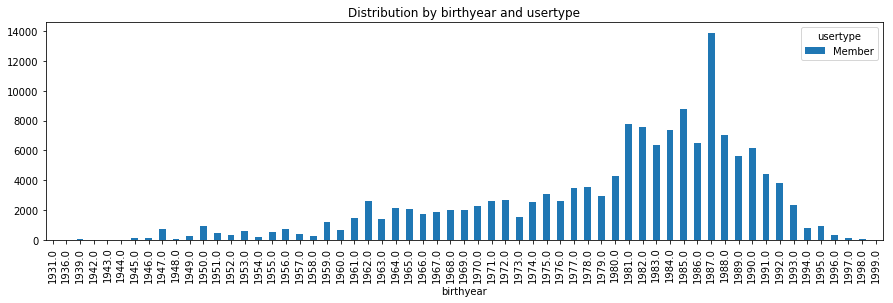

In [43]:
groupby_birthyear_usertype = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_usertype.plot.bar(title="Distribution by birthyear and usertype", stacked=True, figsize=(15,4))



In [49]:
# do we have birthyear information only for members?
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()



True